# Fuente:
* https://www.aprendemachinelearning.com/ejercicio-nlp-cuentos-de-hernan-casciari-python-espanol/
* https://likegeeks.com/es/tutorial-de-nlp-con-python-nltk/

In [30]:
from os import walk
import pickle
import pandas as pd

BLOG_PATH = "/home/jovyan/work/blog"

data = {}

for _, _, filenames in walk(BLOG_PATH):
    for filename in filenames:
        file_full_path = BLOG_PATH + "/" + filename
        with open(file_full_path, "rb") as file:
            data[filename.replace(".txt", "")] = pickle.load(file)
            
data_combined = {key: [value] for (key, value) in data.items()}
anios = [key for key, _ in data.items()]
print(data_combined)

{'2006': ['Más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros, o no firmados pero sí apropiados por terceros. Hay, en esto, dos hechos que me regocijan: el primero es que los informantes se me presentan enojadísimos, es decir, que sienten tan propios esos textos que les causa irritación verlos en otras manos; y el segundo hecho reconfortante es que el plagio menor, en sí mismo, es una forma analfabeta y torpe del homenaje.Me confiesa, por ejemplo, el lector Dish en un correo de hace algunos meses: “(…) me jode tener que encontrarme tus textos en la red con otros nombres. No soporto verte descaradamente retocado, literalmente fusilado, ya sea en web como en foros. Salí en tu defensa en varias ocasiones dejando con el culo al aire y en ridículo a quien se lo merecía. Esta situación me hace sentir para la mierda, y no me gusta.”En general suelo responder estos correos aconsejando a los lectores dolidos que no se hagan mal

In [31]:
pd.set_option('max_colwidth',150)
 
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
2004,"Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácor..."
2005,"Nunca en la puta vida me hubiera imaginado que el diario, siempre plagado de maremotos y de incendios de discotecas, pudiera traer alguna vez una ..."
2006,"Más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros, o no firmados pero sí apro..."
2007,"Desde hace días la Nina quiere interactuar conmigo. Todavía es prematuro decir que intenta tener una relación estable, pero ya empiezo a oír los e..."
2008,"De pronto yo estaba en el hogar donde pasé la infancia; lo supo primero mi nariz. Los ojos se acostumbran tarde a la penumbra, pero mi olfato reco..."
2009,"Google ha lanzado esta semana Latitude, un servicio gratuito que permite ubicar -mediante el celular- a los contactos de la agenda que den su cons..."
2010,"Leo en la prensa económica que, entre las varias empresas que tienen pensado salir a bolsa este año, se encuentra Polaroid, y me sorprende leer el..."
2011,"Esto pasó ayer: Chichita caminaba por una playa desierta, en Mar Azul, costa atlántica argentina, con su revista y su sombrilla, y unos chicos dij..."
2012,"Escribo esto justo cuando el contador llega a dos mil. Por lo tanto, mantenemos el ritmo a pesar de los días de turrones y petardos. Mientras nace..."
2013,"Menos de once segundos antes, cuando el jugador argentino recibe el pase de un compañero, el reloj en México marca las trece horas, doce minutos y..."


# Pasar texto a minúsculas
# Quitar signos de puntuación (interrogación, etc.)
# Quitar espacios extra, cambio de carro, tabulaciones

In [32]:
import re
import string

def apply_lowercase_remove_characters(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def remove_punctuation(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text

 
data_clean = pd.DataFrame(data_df.transcript.apply(lambda x: apply_lowercase_remove_characters(x)))
data_clean = pd.DataFrame(data_clean.transcript.apply(lambda x: remove_punctuation(x)))
data_clean

data_df.to_pickle("corpus.pkl")

# Creación de «Bag of Words»

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
 
with open('spanish.txt') as f:
    lines = f.read().splitlines()

    
cv = CountVectorizer(stop_words=lines)
data_cv = cv.fit_transform(data_clean.transcript)

data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
 
data_dtm.to_pickle("dtm.pkl")
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))
 
data_dtm

,abajo,abananados,abandonaba,abandonado,abandonar,abandonaron,abandoné,abandonó,abanico,abaraja,...,único,únicos,útero,útil,útiles,útimo,českomoravský,české,šeredova,šeredovà
2004,10,0,1,1,0,0,0,0,0,0,...,11,0,0,3,0,1,0,0,0,0
2005,15,0,0,0,0,1,0,0,0,0,...,17,0,3,3,0,0,0,0,0,0
2006,4,0,0,0,0,0,0,0,0,0,...,13,1,0,2,0,0,0,0,0,0
2007,9,0,0,0,1,0,0,0,0,0,...,9,0,0,1,0,0,0,0,0,0
2008,9,0,0,0,0,1,0,1,0,0,...,15,0,0,5,0,0,1,1,1,2
2009,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,2,0,0,0,0,0
2010,8,0,0,0,2,0,0,0,0,0,...,9,0,0,2,0,0,0,0,0,0
2011,7,0,0,0,0,0,0,0,0,0,...,16,4,0,1,0,0,0,0,0,0
2012,8,0,1,0,0,0,0,0,0,1,...,7,1,0,1,0,0,0,0,0,0
2013,0,0,0,0,0,0,0,0,1,0,...,6,1,0,0,0,0,0,0,0,0


In [34]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
abajo,10,15,4,9,9,0,8,7,8,0,13,6
abananados,0,0,0,0,0,0,0,0,0,0,1,0
abandonaba,1,0,0,0,0,0,0,0,1,0,0,0
abandonado,1,0,0,0,0,0,0,0,0,0,0,0
abandonar,0,0,0,1,0,0,2,0,0,0,0,0


# Palabras más usadas por año

In [35]:
top_dict = {}
for c in data.columns: # Años
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
#print(top_dict)
# Print the top 15 words by year
for anio, top_words in top_dict.items():
    print(anio)
    print(', '.join([word for word, count in top_words[0:14]]))

2004
si, alex, vez, lucas, cada, dos, ahora, ser, después, casa, años, siempre, nadie, ver
2005
si, dos, vez, años, siempre, ser, vida, tiempo, hace, ahora, entonces, mundo, después, dice
2006
si, años, dos, vez, siempre, hace, mundo, ser, ahora, entonces, cada, mismo, vida, casa
2007
si, siempre, dos, entonces, vez, años, nunca, ahora, sólo, después, mundo, ser, casa, mujer
2008
dos, si, años, casa, vez, ahora, después, siempre, entonces, hace, ser, tarde, tiempo, mismo
2009
años, si, ahora, casa, vez, después, andrés, ser, dos, vida, hace, mundo, entonces, tres
2010
revista, chiri, si, años, orsai, cada, hacer, dos, ahora, ser, hace, vez, casa, lectores
2011
orsai, revista, número, lectores, dos, si, vez, chiri, años, ahora, hace, cada, siempre, revistas
2012
orsai, dos, cada, si, revista, vez, dijo, chiri, ahora, después, tiempo, mismo, hace, argentina
2013
si, dos, años, cada, dijo, papelitos, ve, después, ahora, vez, nunca, tres, tarde, día
2014
si, vez, dos, años, después, tres, 

# Agregamos Stop Words

En el listado que hay palabras muy usadas pero que realmente no tienen un significado útil para el análisis. Se unirán las 12 listas de más palabras en un nuevo ranking y de esas, tomando las más usadas para agregar en listado de Stop Words.

In [36]:
from collections import Counter

# Let's first pull out the top 30 words for each anio
words = []
for anio in data.columns:
    top = [word for (word, count) in top_dict[anio]]
    for t in top:
        words.append(t)
print(Counter(words).most_common())
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[('si', 12), ('vez', 12), ('cada', 12), ('dos', 12), ('ahora', 12), ('después', 12), ('años', 12), ('hace', 12), ('casa', 11), ('nunca', 11), ('siempre', 10), ('mundo', 10), ('día', 10), ('mismo', 10), ('hacer', 10), ('tiempo', 10), ('ser', 9), ('vida', 9), ('chiri', 9), ('dijo', 8), ('entonces', 8), ('tres', 7), ('noche', 7), ('bien', 6), ('tarde', 6), ('cosas', 5), ('así', 5), ('gente', 5), ('nadie', 4), ('veces', 4), ('orsai', 4), ('lucas', 3), ('ver', 3), ('menos', 3), ('cuatro', 3), ('revista', 3), ('lectores', 3), ('número', 3), ('revistas', 3), ('solo', 3), ('alex', 2), ('tan', 2), ('mejor', 2), ('dice', 2), ('primera', 2), ('sólo', 2), ('decir', 2), ('hombre', 2), ('argentino', 2), ('todavía', 2), ('semana', 2), ('mil', 2), ('va', 1), ('mujer', 1), ('andrés', 1), ('gelós', 1), ('pablo', 1), ('sido', 1), ('salas', 1), ('paola', 1), ('diez', 1), ('ustedes', 1), ('medio', 1), ('idea', 1), ('proyecto', 1), ('año', 1), ('argentina', 1), ('gordo', 1), ('cinco', 1), ('solamente', 1), 

['si',
 'vez',
 'cada',
 'dos',
 'ahora',
 'después',
 'años',
 'hace',
 'casa',
 'nunca',
 'siempre',
 'mundo',
 'día',
 'mismo',
 'hacer',
 'tiempo',
 'ser',
 'vida',
 'chiri',
 'dijo',
 'entonces',
 'tres',
 'noche']

# Actualización de Bag of Words

In [38]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
with open('spanish.txt') as f:
    stop_words = f.read().splitlines()
for pal in add_stop_words:
    stop_words.append(pal)
more_stop_words=['alex','lucas','andrés','mirta','tres','primer','primera','dos','uno','veces', 'así', 'luego', 'quizá','cosa','cosas','tan','asi','andres','todas','sólo','jesús','pablo','pepe']
for pal in more_stop_words:
    stop_words.append(pal)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

# Nube de Palabra

In [26]:
!pip install wordcloud

     |████████████████████████████████| 368kB 1.8MB/s eta 0:00:01


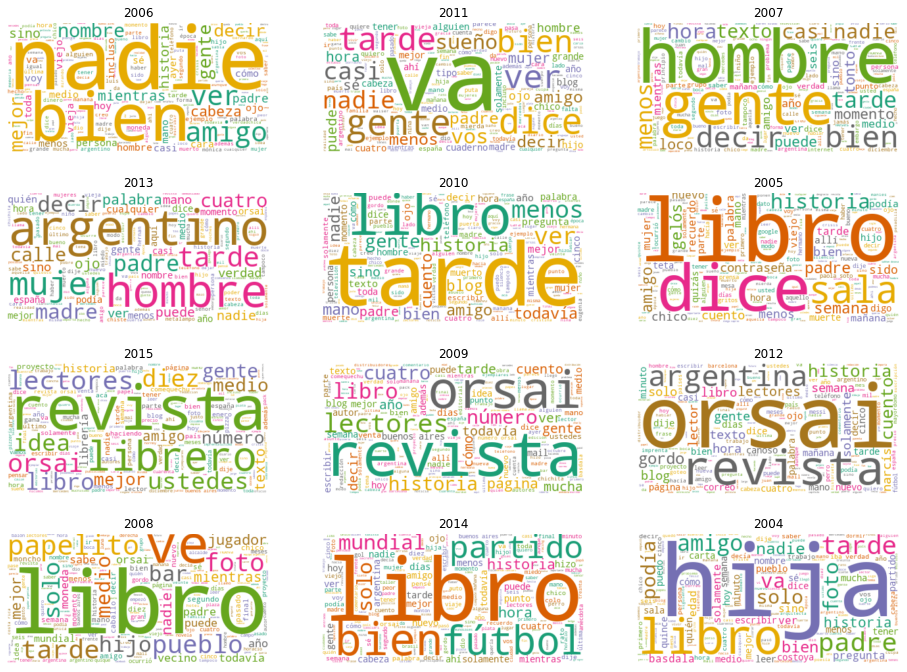

In [39]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]

# Create subplots for each anio
for index, anio in enumerate(data.columns):
    wc.generate(data_clean.transcript[anio])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(anios[index])
plt.show()

# Estadísticas de Palabras por año

In [41]:
# Find the number of unique words per Year
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for anio in data.columns:
    uniques = data[anio].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(anios, unique_list)), columns=['Anio', 'unique_words'])
#data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort = data_words # sin ordenar
data_unique_sort
# ejecuta este si hicimos el webscrapping, o no tenemos los valores en la variable
posts_per_year=[]
try:
  enlaces
except NameError:
  # Si no hice, los tengo hardcodeados:
    posts_per_year = [50, 27, 18, 50, 42, 22, 50, 33, 31, 17, 33, 13]
else:
    for i in range(len(anios)):
        arts = enlaces[i]
        #arts = arts[0:10] #limito a maximo 10 por año
        print(anios[i],len(arts))
        posts_per_year.append(min(len(arts),MAX_POR_ANIO))

# Find the total number of words per Year
total_list = []
for anio in data.columns:
    totals = sum(data[anio])
    total_list.append(totals)
    
# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['posts_per_year'] = posts_per_year
data_words['words_per_posts'] = data_words['total_words'] / data_words['posts_per_year']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
#data_wpm_sort = data_words.sort_values(by='words_per_posts')
data_wpm_sort = data_words #sin ordenar
data_wpm_sort

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
abajo,10,15,4,9,9,0,8,7,8,0,13,6
abananados,0,0,0,0,0,0,0,0,0,0,1,0
abandonaba,1,0,0,0,0,0,0,0,1,0,0,0
abandonado,1,0,0,0,0,0,0,0,0,0,0,0
abandonar,0,0,0,1,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
útimo,1,0,0,0,0,0,0,0,0,0,0,0
českomoravský,0,0,0,0,1,0,0,0,0,0,0,0
české,0,0,0,0,1,0,0,0,0,0,0,0
šeredova,0,0,0,0,1,0,0,0,0,0,0,0
